# Final Project PIC 16A

By: Jessica Hanna and Karen Yi

## Group Contributions Statement
Briefly describe which group members contributed to which parts of the project (parts listed below).

“Both of us wrote the data import, cleaning, exploratory analysis, and feature selection, and the neural network model. Karen completed the logistic regression model. Jessica completed the random forest model. We all checked each other’s work and made revisions to code and writing.”

## Data import and cleaning 

In [184]:
# general imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import datetime as dt

In [238]:
# read in dataset from online repository
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

#penguins = penguins.dropna()

# split dataset into train and test
train,test = train_test_split(penguins, test_size = .2,random_state = 0)

# check if split was done correctly 
print(len(train),len(test))
print(train.head())

275 69


In [186]:
def clean_penguins(df):
    """
    Clean the data by dropping missings and recoding variables.
    """
    np.random.seed(1234)
    
    # recode binary variable(s)
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])

    # recode species
    df['Species'] = df['Species'].str.split().str.get(0)
    
    # recode date egg laid
    df['Date Egg']=pd.to_datetime(df['Date Egg'])
    df['Date Egg 2']=df['Date Egg'] - dt.datetime(2007,11,11)
    df['Date Egg 2']=df['Date Egg 2'].dt.days

    # is Sex = 3 a mistake or intersex ??
    df = df[df['Sex'] != 0]
    df = df[df['Sex'] != 3]
    
    return(df)

In [187]:
# clean training data (testing data cleaned later)
train = clean_penguins(train)

C:\Users\notka\AppData\Local\Temp/ipykernel_4864/328469575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])


In [188]:
# split training data into X and y
X_train = train.drop(['Species'], axis = 1)
y_train = train['Species']

# check if split was done correctly
# print(X_train.head())
# print(y_train.head())

## Exploratory Analysis
Compute summary statistics and construct visualizations about the relationships between variables. 

1. Your exploratory analysis should include at least 3 figures and at least 1 displayed table. (2-person groups need include only 2 figures and 1 table.)

2. You must demonstrate three (2) different types of figures, such as scatterplots, histograms, boxplots, and barcharts. At least one figure must contain multiple axes. 
    1. For each figure, you should explain how it illustrates a point which supports your modeling decisions below. Even if you ultimately select your features using some method that is unrelated to the figures, your discussion should give your reader an intuitive interpretation about why those features might be helpful or informative. 
    
All figures and tables should be polished and legible, with clear legends and axis-labels. 

In [245]:
# compute summary statistics
# how to view whole table/all columns?
train.groupby(['Species']).aggregate([len,np.mean,np.std,np.min,np.max]).round(2)

Sample Number                     \
                                                    len   mean    std amin   
Species                                                                      
Adelie Penguin (Pygoscelis adeliae)                 118  75.92  44.63    1   
Chinstrap penguin (Pygoscelis antarctica)            58  32.59  19.52    1   
Gentoo penguin (Pygoscelis papua)                    99  65.39  36.18    1   

                                               Culmen Length (mm)         \
                                          amax                len   mean   
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)        152                118  39.04   
Chinstrap penguin (Pygoscelis antarctica)   68                 58  48.55   
Gentoo penguin (Pygoscelis papua)          123                 99  47.60   

                                                             ...  \
                                            std  amin  amax  ...   
Species                                                      ...   
Adelie Penguin (Pygoscelis adeliae)        2.66  33.1  46.0  ...   
Chinstrap penguin (Pygoscelis antarctica)  3.23  40.9  58.0  ...   
Gentoo penguin (Pygoscelis papua)          3.22  40.9  59.6  ...   

                                          Delta 15 N (o/oo)                    \
                                                        len  mean   std  amin   
Species                                                                         
Adelie Penguin (Pygoscelis adeliae)                     118  8.89  0.43  7.70   
Chinstrap penguin (Pygoscelis antarctica)                58  9.34  0.38  8.47   
Gentoo penguin (Pygoscelis papua)                        99  8.27  0.26  7.63   

                                                 Delta 13 C (o/oo)         \
                                            amax               len   mean   
Species                                                                     
Adelie Penguin (Pygoscelis adeliae)         9.80               118 -25.75   
Chinstrap penguin (Pygoscelis antarctica)  10.03                58 -24.55   
Gentoo penguin (Pygoscelis papua)           8.83                99 -26.23   

                                                               
                                            std   amin   amax  
Species                                                        
Adelie Penguin (Pygoscelis adeliae)        0.61 -26.79 -23.90  
Chinstrap penguin (Pygoscelis antarctica)  0.22 -25.15 -23.89  
Gentoo penguin (Pygoscelis papua)          0.52 -27.02 -25.00  

[3 rows x 35 columns]

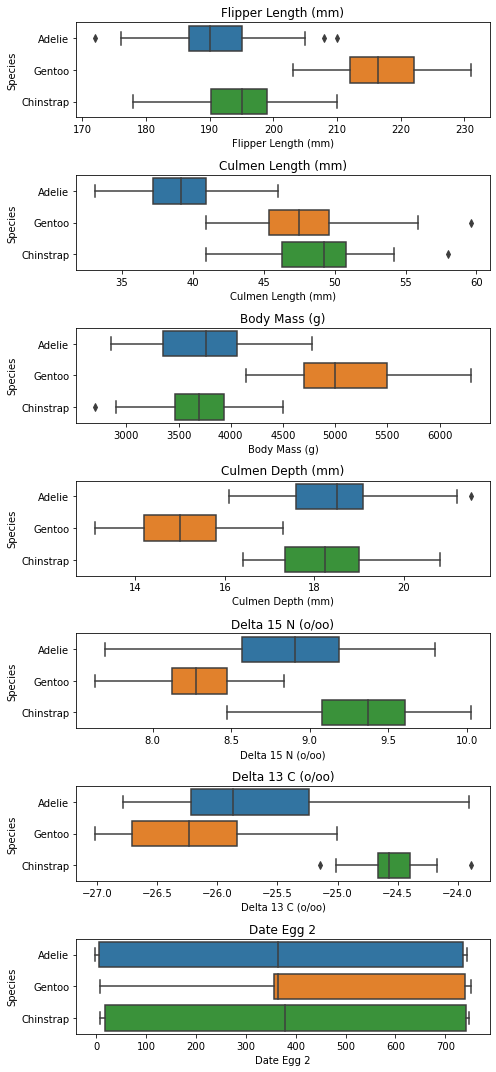

In [190]:
import seaborn as sns

# create a subset of quantitative columns to explore
cols = ["Flipper Length (mm)", "Culmen Length (mm)", "Body Mass (g)", 
        "Culmen Depth (mm)", "Delta 15 N (o/oo)","Delta 13 C (o/oo)", "Date Egg 2"]

# create a figure with X number of subplots (to match the number of variables to explore)
fig, ax = plt.subplots(len(cols), 1, figsize = (7, 15))

# plot in each subplot
for i in range(len(cols)):
    # create seaborn boxplot for each variable
    # each boxplot is further split by species, to view how the variable predicts species
    fgrid=sns.boxplot(data=train,ax = ax[i],  
                    x=train[cols[i]],
                    y="Species").set(title = cols[i])

# formatting
plt.tight_layout()

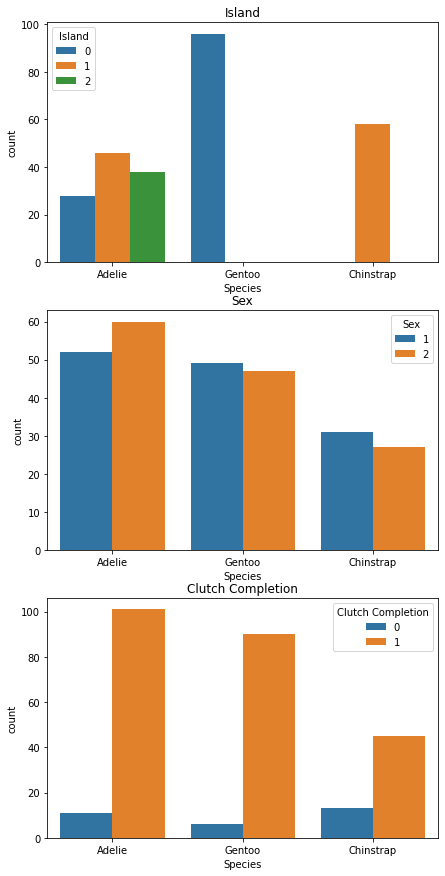

In [191]:
# create a subset of qualitative variables
cols = ["Island", "Sex", "Clutch Completion" ]
fig, ax = plt.subplots(len(cols), 1, figsize = (7, 15))

for i in range(len(cols)):
    fgrid=sns.countplot(data=train,ax = ax[i],  
                    x = "Species" ,
                  hue = train[cols[i]]).set(title = cols[i])

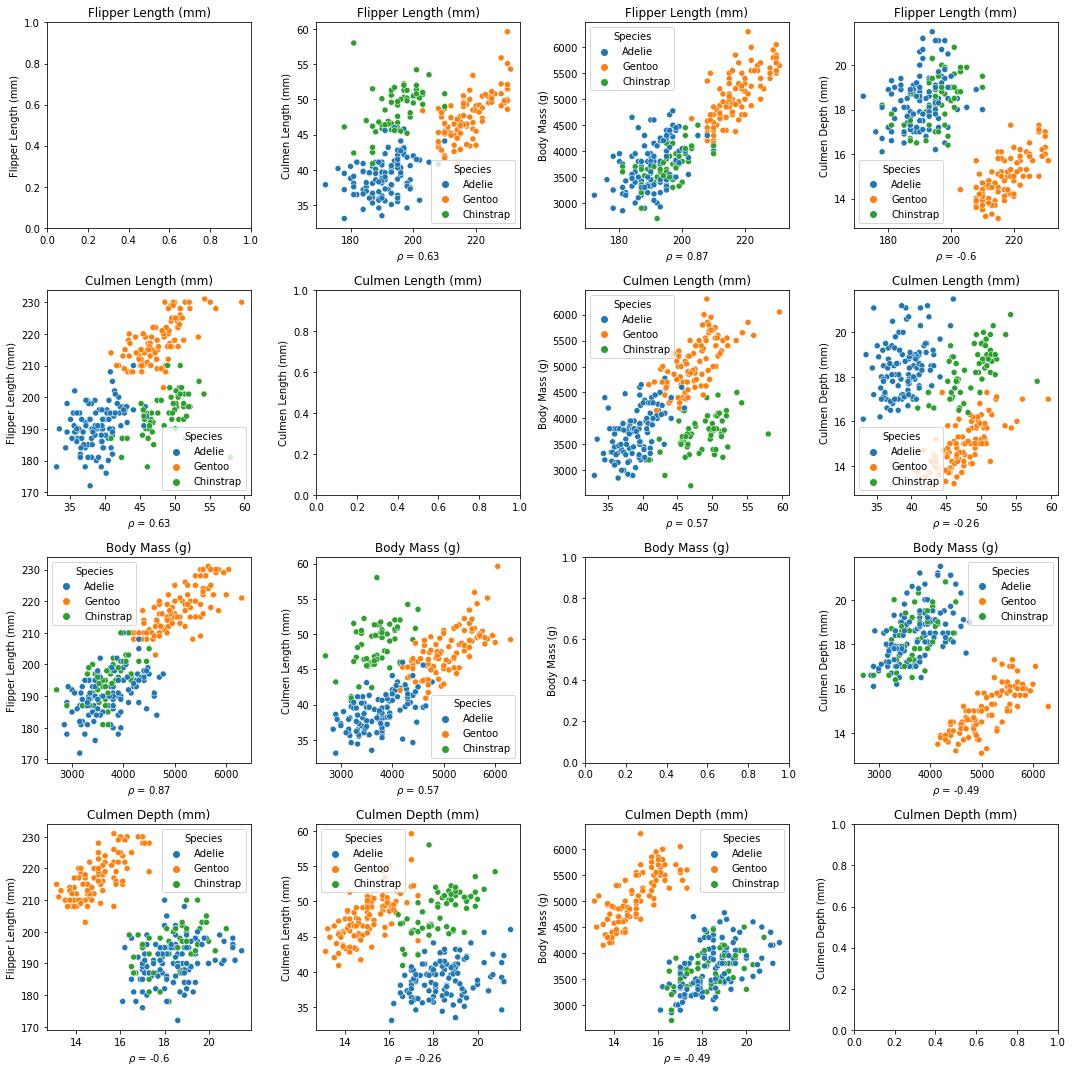

In [192]:
import numpy as np
import pandas as pd

def scatterplot_matrix(cols, figsize):
    """
    Creates a scatterplot matrix where there is a separate scatterplot for each 
    possible pair of variables(specific column x specific column). 
    
    Parameters
    ----------
    cols: list of strings, each of which are the name of one of 
    the columns from the happiness data frame
    figsize: size of the figure
    
    """
    #Gets the length of the columns
    col_len = len(cols)
    
    #Creates figure (9 subplots according to amount of columns)
    fig, ax = plt.subplots(col_len, col_len, figsize = figsize)
    
    #For every combination of column x column...
    for i in range(col_len):
        for j in range(col_len):
            
            #Titles every subplot in the scatterplot matrix for the 
            #specific column against column combination
            ax[i][j].set(title = cols[i], ylabel = cols[j])
            
            #Only plot data for subplots where the variable isn't against itself 
            #(leaves the diagonal empty)
            if i != j: 
                fgrid=sns.scatterplot(data=train,ax = ax[i][j],  
                    x = train[cols[i]] , y = train[cols[j]],
                  hue = "Species")
                #ax[i][j].scatter(train[cols[i]], train[cols[j]], c = train["Species"])
                
                #Computes the correlation coefficient between two or more variables.
                #Uses it to add captions to each panel of the plot giving the correlation coefficient
                #between the plotted variables
                P = np.corrcoef(train[cols[i]], train[cols[j]])
                corrCo = P[0,1]
                ax[i][j].set(xlabel = r"$\rho$ = " + str(np.round(corrCo, 2)))
    plt.tight_layout()
    
cols = ["Flipper Length (mm)", "Culmen Length (mm)", "Body Mass (g)", "Culmen Depth (mm)" ]
scatterplot_matrix(cols,figsize = (15,15))

The matrix scatter plot above shows us how much different variables correlate with each other and allows us to determine which variables might correlate too much with one another, allowing us to determine what might overfit our model and thus exclude that from our data analysis.  

The only variables that appear to be of concern are Body Mass and Flipper Length, which are highly correlated at .87; we won't use those together in any model.

## Feature Selection
Your models in the next section will use one qualitative feature (like Island or Sex) and two quantitative features (like Culmen Length or Body Mass). You should spend one section in which you perform an analysis to choose these features, and justify your choice. 

Your approach can be based on your exploratory data analysis; automated feature selection; or any other method – but you must be prepared to justify and write about your proposal. 

You are permitted to use different combinations of features for each of your three models (below). In this case, you should use the Feature Selection section to explain and illustrate your approach for a single model, which you can then repeat (without extensive explanation) for the other two models. Please remember that repetitive code should be wrapped in functions.

In [241]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import itertools
# how do you know what ML model to use??? tradeoffs

# date and delta n doesn't work when fitting models
#"Culmen Length (mm)", "Body Mass (g)", "Culmen Depth (mm)", "Delta 15 N (o/oo)","Delta 13 C (o/oo)", "Date Egg 2"
cols=np.array(["Flipper Length (mm)", "Culmen Length (mm)", "Body Mass (g)", 
               "Culmen Depth (mm)","Sex","Island","Clutch Completion"])

def check_column_score(cols,mod):
    """
    Train and evaluate the model via cross-validation on the columns with selected indices
    
    Each time this function runs, we are trying to predict Species from a combination of variables in array `cols`
    that always leaves out 1 variable, variable i, from the combination.
    
    We're trying to figure out which variable is most important: if we leave out a variable and the CV score is low,
    then that variable is really important.
    
    parameter cols: columns to train on, leaving out 1 column at a time from the full set
    parameter mod: model to train
    """
    return cross_val_score(mod,X_train[cols],y_train, cv=5).mean()

def feature_check(mod):
    """
    Check the performance of a user-specified model, using
    each combination of X variables in predicting Species.
    
    parameter mod: model to train
    """
    
    # message for what model is being trained
    print("using model: " + str(mod).split("(")[0])
    
    for i in range(len(cols)):
        # message for what columns are being omitted
        print("leaving out column: " + str(cols[i]))
        # performance when specific column is not used in the model
        print("CV score is " + str(np.round(check_column_score(cols[np.arange(len(cols)) != i],mod),3))) 

In [194]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# suppress convergence warnings only to make output clearer in the following sections
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

We are now going to examine which variables, when left out, produce the lowest CV scores.

In [195]:
#neural network model
MLP=MLPClassifier(solver='lbfgs',
                 alpha=1e-5,
                 hidden_layer_sizes=(100,100, 100,100),
                 random_state = 0,
                 max_iter=1000)

feature_check(MLP)

using model: MLPClassif
leaving out column: Flipper Length (mm)
CV score is 0.421
leaving out column: Culmen Length (mm)
CV score is 0.421
leaving out column: Body Mass (g)
CV score is 0.989
leaving out column: Culmen Depth (mm)
CV score is 0.504
leaving out column: Sex
CV score is 0.64
leaving out column: Island
CV score is 0.621
leaving out column: Clutch Completion
CV score is 0.64


The best quantitative variables for neural networks appear to be Flipper Length and Culmen Length.
The best qualitative variable is Island.

In [242]:
#logistic regression model
LR=LogisticRegression(max_iter=1000)

feature_check(LR)

using model: LogisticRegression
leaving out column: Flipper Length (mm)
CV score is 0.992
leaving out column: Culmen Length (mm)
CV score is 0.756
leaving out column: Body Mass (g)
CV score is 0.981
leaving out column: Culmen Depth (mm)
CV score is 0.97
leaving out column: Sex
CV score is 0.985
leaving out column: Island
CV score is 0.985
leaving out column: Clutch Completion
CV score is 0.989


The best quantitative variables for logistic regression appear to be Culmen Length and Culmen Depth.
The best qualitative variable is Island.

In [243]:
#random forest classifier model
RF=RandomForestClassifier()

feature_check(RF)

using model: RandomForestClassifier
leaving out column: Flipper Length (mm)
CV score is 0.989
leaving out column: Culmen Length (mm)
CV score is 0.857
leaving out column: Body Mass (g)
CV score is 0.992
leaving out column: Culmen Depth (mm)
CV score is 0.992
leaving out column: Sex
CV score is 0.992
leaving out column: Island
CV score is 0.989
leaving out column: Clutch Completion
CV score is 0.992


The best quantitative variables for random forest appear to be Flipper Length and Culmen Length.
The best qualitative variable is Island.

## Modeling
Deploy at least three machine learning models and evaluate their performance. You can use any three machine learning models from Scikit Learn, **except decision trees.** For each model, do the following: 
1. *Cross-validation* to choose complexity parameters
2. *Evaluation* on unseen testing data, including a confusion matrix. (Your confusion matrix should be evaluated only on the test set. Not on the training set.)
3. *Visualization* of decision regions for the model, with one plot corresponding to each value of the qualitative variable. You are not permitted to use the mlxtend package to construct your decision regions. Your colors must be consistent between your decision region plots. You must also provide a readable legend and correct axis labels.
4. *Discussion* of the mistakes made by each model. Your discussion should give intuition for why the model fails in certain cases, using the decision regions to illustrate your explanation.

__

Models
1. Neural network
2. Logistic regression
3. Random forests

In [198]:
# general imports and preprocessing
from sklearn.metrics import confusion_matrix

test = clean_penguins(test)
print(test.shape)
X_test = test.drop(['Species'], axis = 1)
y_test = test['Species']

le=preprocessing.LabelEncoder()
y_test=le.fit_transform(y_test)

# X_test = X_test.dropna(how='all',axis=0)
# y_test = y_test.dropna(how='all',axis=0)

(36, 18)


C:\Users\notka\AppData\Local\Temp/ipykernel_4864/328469575.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df['Sex'])


In [223]:
# dictionary for colors
colors = {
    "Adelie": "green",
    "Gentoo": "blue",
    "Chinstrap": "red"
}

In [224]:
# custom functions

def confusion(m,X,y):
    p=m.predict(X)
    return confusion_matrix(y,p)

#     # examine mistakes
#     mask=y!=p
#     mistakes=X[mask]
#     mistake_labels=y[mask] # mistake true labels
#     mistake_p=p[mask] # mistake predictions

    # visualize mistakes
#     m_plots=len(mistakes)
#     fig,ax=plt.subplots(1,m_plots)

#     for i in range(m_plots):
#         ax[i].imshow(mistakes[i].reshape(8,8),cmap=plt.cm.binary)
#         ax[i].set(title=str(mistake_preds[i]))
    #return(mistake_p)

def plot_regions(data,cols,m):
    """
    parameter c: model
    parameter X: X data
    """
    
    X = data.drop('Species',axis=1)
    X = X[cols]
    y = data['Species']

    # how do we know what variables for axes???
    x0=X["Culmen Length (mm)"]
    x1=X["Culmen Depth (mm)"]

    grid_x=np.linspace(x0.min(),x0.max(),501) 
    grid_y=np.linspace(x1.min(),x1.max(),501) 
    
    # create a matrix of data to predict off of
    xx,yy=np.meshgrid(grid_x,grid_y)

    # format the matrix
    XX=xx.ravel()
    YY=yy.ravel()
    
    # create a constant ZZ corresponding to the particular island
    ZZ=np.ones(501**2) * X['Island'].mode()[0]

    # predict data using the model 
    p=m.predict(np.c_[XX,YY,ZZ])
    
    # reshape predictions
    p=p.reshape(xx.shape)

    # initialize figure
    fig,ax=plt.subplots(1)

    #plot the decision regions
    ax.contourf(xx,yy,p,cmap="jet",alpha=.2)
    # add in dictionary for c
    ax.scatter(x0,x1,cmap="jet")
    ax.set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")
    # title by island
    
def print_dict(dictionary):
    for key,value in dictionary.items():
        print(key,":\t",value)  

#### Neural Networks

In [200]:
# For neural network, we found these variables to be the most helpful in predicting species.
nncols = ["Culmen Length (mm)","Culmen Depth (mm)","Island"]

In [226]:
## Cross validation

hiddenLayerDict = {}

# Now we need to fine-tune the complexity parameter
# found that a value of 80 is best for hidden layer size
for i in range(5,15):
    hls=10*i
    MLP=MLPClassifier(solver='lbfgs',
                 alpha=1e-5,
                 hidden_layer_sizes=(hls,hls,hls,hls), 
                 random_state = 0)
    hiddenLayerDict[hls] = check_column_score(nncols,MLP)
    
print_dict(hiddenLayerDict)

50 :	 0.9849056603773585
60 :	 0.9849056603773585
70 :	 0.9811320754716981
80 :	 0.9849056603773585
90 :	 0.9849056603773585
100 :	 0.9811320754716981
110 :	 0.9849056603773585
120 :	 0.9849056603773585
130 :	 0.9773584905660376
140 :	 0.9811320754716981


In [227]:
## Evaluation

# create the best MLP model using above parameters
best_MLP=MLPClassifier(solver='lbfgs',
                 alpha=1e-5,
                 hidden_layer_sizes=(80,80,80,80), random_state = 0)
best_MLP.fit(X_test[nncols],y_test)

# confusion matrix
confusion(best_MLP,X_test[nncols],y_test)

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 16]], dtype=int64)

""


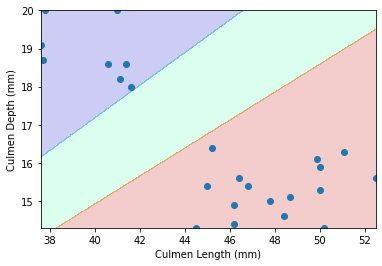

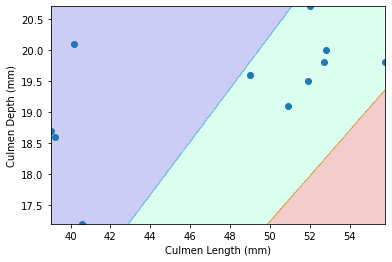

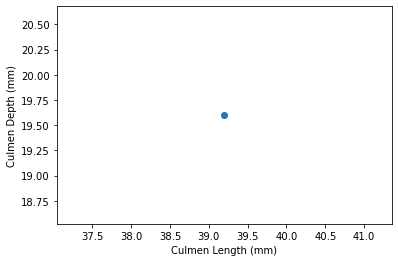

In [228]:
## Plot decision regions
test.groupby(['Island']).apply(plot_regions,nncols,best_MLP)

# why is the plot N so small? are we supposed to be plotting train or test data?

Discussion

This model made no mistakes when deployed on the testing data.

#### Logistic Regression

In [233]:
lrcols = ['Culmen Length (mm)','Culmen Depth (mm)','Island']

In [234]:
## Cross validation

# initialize dictionary for parameters
param_dict = {}

# check a range of values of C (regularization parameter) for performance
# when we split the data into 5 and use each piece as "testing" data in turn
for i in range(1,10):
    # this gives us a good range of factors of 10
    c=100000/(i**i)
    LR=LogisticRegression(C=c,max_iter=1000) 
    param_dict[round(c,0)] = check_column_score(lrcols,LR)

# print dict
print_dict(param_dict)

100000.0 :	 0.9811320754716981
25000.0 :	 0.9811320754716981
3704.0 :	 0.9811320754716981
391.0 :	 0.9811320754716981
32.0 :	 0.9811320754716981
2.0 :	 0.9735849056603773
0.0 :	 0.73319357092942


The best regularization parameter caps out at about 32. 

In [235]:
## Evaluation

# create the best LR model using above parameters
best_LR=LogisticRegression(C=32) 

best_LR.fit(X_test[lrcols],y_test)

# confusion matrix
confusion(best_LR,X_test[lrcols],y_test)

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  0, 16]], dtype=int64)

""


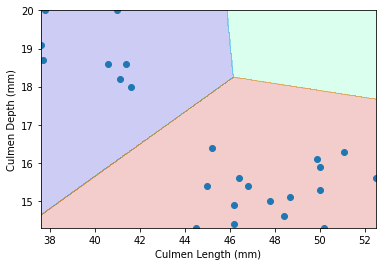

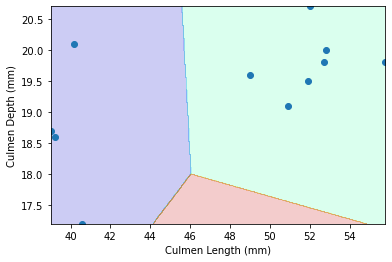

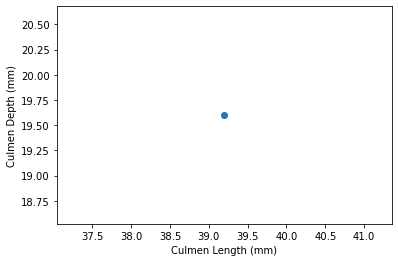

In [236]:
## Plot decision regions
test.groupby(['Island']).apply(plot_regions,lrcols,best_LR)

Discussion

This model made no mistakes on the testing data.

### Random Forest Classification

In [ ]:
#complexity parameters for Random Forrest Classification Model

hiddenLayerList = []

#Now we need to fine-tune the complexity parameter
#found that a value of 20 and 70 are best for max_depth parameter
for i in range(1,10):
    RF=RandomForestClassifier(max_depth= i*10)
      
    hiddenLayerList.append(check_column_score(cols,RF))
    
print(hiddenLayerList)


## Discussion
Describe the overall performance of your models, state which combination of model and features (measurements) you recommend. Discuss how the model could be improved if more or different data were available.